In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

In [59]:
df = pd.read_csv('/Users/zhengjing/Documents/ce599-s17 gina/final report/data/30cities.csv')
df

,City,Population,Median Age,Males,Median Earings($),No_vehicle_available_percentage,Worked at Home(%),Drove alone(%),Carpooled,Transit_percentage,Walked(%),Bicycled(%)
0,New York,8405837,40.2,0.515,37333,46.0,4.1,21.4,4.9,56.7,10.0,1.2
1,Los Angeles,3884307,30.6,0.551,27550,6.8,5.4,67.1,9.9,10.8,3.6,1.2
2,Chicago,2718782,37.7,0.519,34518,16.4,4.4,49.7,8.5,27.8,6.7,1.4
3,Houston,2195914,38.8,0.562,30252,4.6,3.7,75.3,12.2,4.2,2.2,0.8
4,Philadelphia,1553165,38.6,0.480,30372,18.9,2.9,49.9,8.5,27.2,8.1,2.3
5,Phoenix,1513367,40.0,0.549,31002,4.0,4.6,74.7,12.0,4.0,1.8,0.6
6,San Antonio,1409019,39.1,0.533,27500,4.1,3.2,78.9,11.1,3.6,1.7,0.3
7,San Diego,1355896,38.0,0.551,37280,3.2,6.2,74.9,8.7,4.2,3.7,0.8
8,Dallas,1257676,37.8,0.560,30208,4.3,4.4,75.8,11.8,3.8,3.5,0.3
9,San Jose,998537,41.0,0.561,42022,1.8,3.9,75.8,11.8,4.5,1.7,1.0


In [49]:
#total of cities we record
df = df[df['Population']>0]
len(df)

30

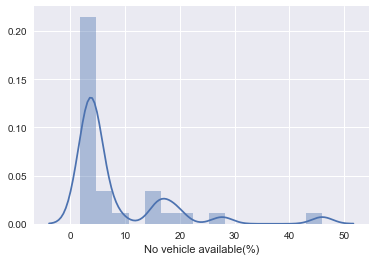

In [50]:
#It is often a good idea to look at the data we want to model, 
#and see how it relates to some variables we expect to be 
#important. We can do this using seaborn. 
'''
plot the graph from following order 

New York
Los Angeles
Chicago
Houston
Philadelphia
Phoenix
San Antonio
San Diego
Dallas
San Jose
Austin
Indianapolis
Jacksonville
San Francisco
Columbus
Charlotte
Fort Worth
Detroit
El Paso
Memphis
Seattle
Denver
Washington
Boston
Nashville
Baltimore
Oklahoma City
Louisville
Portland
Las Vegas'''

sns.distplot(df['No vehicle available(%)'])

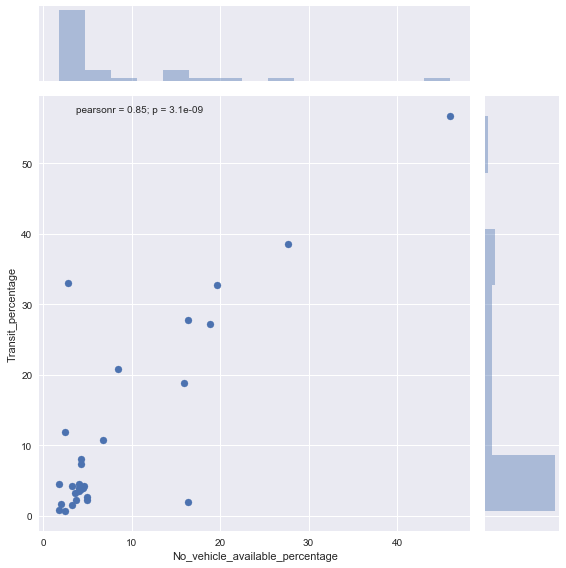

In [63]:
# we may think that no vehicle relate to transit, so let's look at that relationship

sns.jointplot(x="No_vehicle_available_percentage", y="Transit_percentage", data=df, size=8)

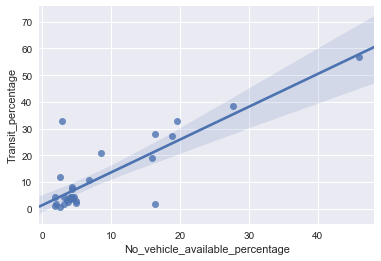

In [61]:
# we can also look at a regression plot 
sns.regplot(x="No_vehicle_available_percentage", y="Transit_percentage", data=df)

In [64]:
#we want to estimate what the model coefficients are. 
mod = smf.ols(formula='Transit_percentage ~ No_vehicle_available_percentage ', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Transit_percentage   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     72.06
Date:                Wed, 03 May 2017   Prob (F-statistic):           3.14e-09
Time:                        16:36:12   Log-Likelihood:                -102.15
No. Observations:                  30   AIC:                             208.3
Df Residuals:                      28   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

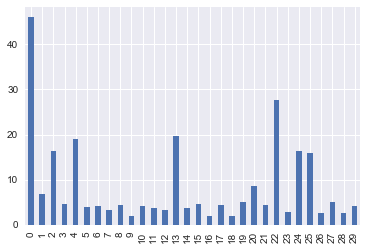

In [68]:
#the graph is easily to tell the percentage of people have no vehicle 
#new york has largest percentage(46%) that peopel do not have vehicle 
df['No_vehicle_available_percentage'].plot(kind='bar')